# Binary Classification_ Breast Cancer

## content

- **資料前處理**
- [1. Import modules & classes](#import)
- [2. data for Binary Classification](#data)
- [3. Creating feature dataset [X] & labeled data [y]](#feature&label)
- [4. Adding the column names (補充)](#colName)
- [5. Feature Selection Methods](#featureSelection)
- [6. Normalization](#normalization)
- [7. Splitting the training and test datasets](#splitting)
- [8. Setting Confusion Matrix](#confusionMatrix)
- [9. Training Models for Classification](#training)
- [Perceptron (感知器) Algorithm](#perceptron)
- [Logistic Regression (邏輯回歸) Algorithm](#LogisticRegression)
- [Multilayer Perceptron (多層感知器, MLP)](#MLP)
- [Tree](#tree)

<a id= import></a>
## 1. Import modules & classes

In [1]:
import numpy as np  #進行科學計算
import pandas as pd #數據分析工具

#數據可視化
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
#在Jupyter Notebook中嵌入Matplotlib圖表，使得圖表直接在Notebook中顯示而不需要使用 plt.show()。
%matplotlib inline  

#機器學習算法和工具
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

<a id= data></a>
## 2. data for Binary Classification

+ Breast Cancer(乳癌) Wisconsin (Original) Dataset
+ **sklearn.datasets.load_breast_cancer** - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

In [3]:
from sklearn.datasets import load_breast_cancer
wdbc = load_breast_cancer()  
wdbc

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

<a id= feature&label></a>
## 3. Creating feature dataset [X] & labeled data [y]

In [4]:
X = pd.DataFrame(wdbc.data)  # 將feature轉換成dataFrame
X

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
y = pd.Series(wdbc.target)  #將target轉換成1維的序列資料(series)
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Length: 569, dtype: int32

<a id= colName></a>
## 4. Adding the column names (補充)

    從wdbc中抓取col名稱:
    array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
            'mean smoothness', 'mean compactness', 'mean concavity',
            'mean concave points', 'mean symmetry', 'mean fractal dimension',
            'radius error', 'texture error', 'perimeter error', 'area error',
            'smoothness error', 'compactness error', 'concavity error',
            'concave points error', 'symmetry error',
            'fractal dimension error', 'worst radius', 'worst texture',
            'worst perimeter', 'worst area', 'worst smoothness',
            'worst compactness', 'worst concavity', 'worst concave points',
            'worst symmetry', 'worst fractal dimension'], dtype='<U23')


In [6]:
column_names = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'points_mean', 'symmetry_mean', 'dimension_mean', 'radius_se',
       'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'points_se', 'symmetry_se',
       'dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'points_worst', 'symmetry_worst', 'dimension_worst']

X.columns = column_names
X.head()  #顯示前5筆資料

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<a id='featureSelection'></a>
## 5. Feature Selection Methods


### 5.1 Removing features with low varianc

- sklearn.feature_selection.VarianceThreshold - Feature selector that removes all low-variance features.
- The variance of the feature variables is given by  Var[X]=p∗(1−p) .
- **`Removing features with low variance`** is  *`a simple baseline approach`* to feature selection.

In [10]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))  # p = 0.8
X_remove_variance = sel.fit_transform(X)
X_remove_variance.shape

#sel.get_params()  =>threshold value

(569, 11)

In [11]:
X.columns[sel.get_support()]   # The features remained

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'texture_se', 'perimeter_se', 'area_se', 'radius_worst',
       'texture_worst', 'perimeter_worst', 'area_worst'],
      dtype='object')

### 5.2 Univariate feature selection

- SelectKBest : removing all but the k highest scoring features.

+ The most often used statistical tests include :
    + For classification :
        + **`chi-squared (chi²) statistical test`** - Computing chi-squared stats between each non-negative feature and class.
        + **`F-test` : `f_classif`** - Computing the ANOVA F-value for the provided sample.
        + **`mutual_info_classif`** - Estimate mutual information for a discrete target variable.
    + For regression :
        + `F-test` : `f_regression` - Univariate linear regression tests.
        + `mutual_info_regression` : Estimate mutual information for a continuous target variable.

In [12]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

##  Selecting Top 10 Best Features using SelectKBest class
kc = SelectKBest(score_func=chi2, k=10) 
kf = SelectKBest(score_func=f_classif, k=10)
km = SelectKBest(score_func=mutual_info_classif, k=10)

kc_fit = kc.fit(X,y)
kf_fit = kf.fit(X,y)
km_fit = km.fit(X,y)

kc_scores = pd.DataFrame(kc_fit.scores_)  # Scores of features.
kf_scores = pd.DataFrame(kf_fit.scores_)  # Scores of features.
km_scores = pd.DataFrame(km_fit.scores_)  # Scores of features.
X_columns = pd.DataFrame(X.columns)

# Combine dataframes ...
featureScores = pd.concat([X_columns, kc_scores, kf_scores, km_scores], axis=1)
# Naming the dataframe's columns ...
featureScores.columns = ['Specs', 'chi2_Scores', 'f-test_Scores',
                         'mutual_info_scores']
featureScores

,Specs,chi2_Scores,f-test_Scores,mutual_info_scores
0,radius_mean,266.104917,646.981021,0.370358
1,texture_mean,93.897508,118.096059,0.097955
2,perimeter_mean,2011.102864,697.235272,0.404399
3,area_mean,53991.655924,573.060747,0.359605
4,smoothness_mean,0.149899,83.651123,0.085279
5,compactness_mean,5.403075,313.233079,0.211710
6,concavity_mean,19.712354,533.793126,0.375559
7,points_mean,10.544035,861.676020,0.441942
8,symmetry_mean,0.257380,69.527444,0.065427
9,dimension_mean,0.000074,0.093459,0.005546


<Figure size 1000x2000 with 0 Axes>

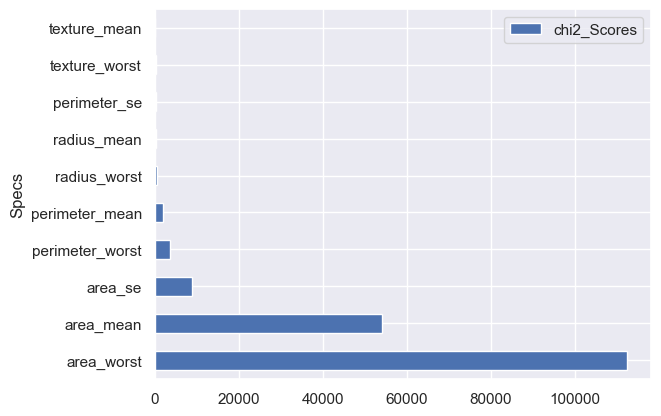

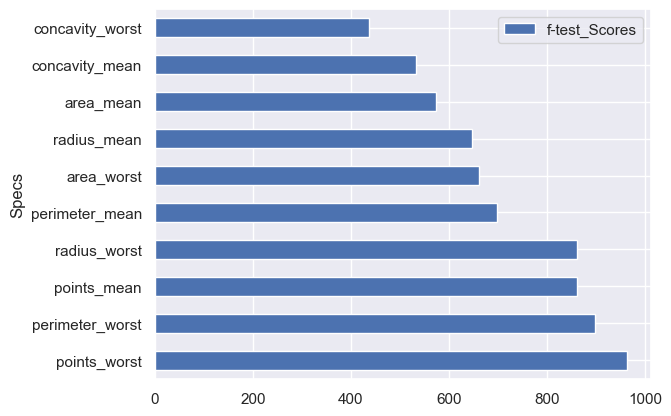

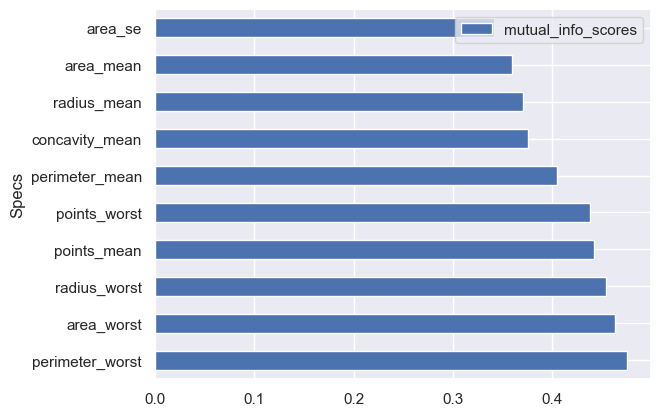

In [13]:
plt.figure(1, figsize=(10, 20))
for i in range(3):
    fs = featureScores.columns[i+1] #第1、2、3欄
    best_features = featureScores.nlargest(10, fs)[['Specs', fs]] #nlargest=>排序
    best_features.plot.barh('Specs');   # pands plot()

### 5.3 Recursive feature elimination

- sklearn.feature_selection.RFE - Feature ranking with recursive feature elimination.
- The least important features are pruned recursively until the desired number of features is eventually reached and hence selected.

In [14]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=100, n_estimators=50)

rfe_model = RFE(rfc, n_features_to_select = 4, # Select 4 features (What about 10?)
                step = 1)  # step = 1 : remove one at a time
rfe = rfe_model.fit(X, y.astype('int'))
rfe.support_   # rfe.get_support()

array([False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
        True, False, False])

In [15]:
X.columns[rfe.support_]

Index(['points_mean', 'radius_worst', 'perimeter_worst', 'points_worst'], dtype='object')

In [16]:
print(rfe.ranking_)  # Selected (i.e., estimated best) features are assigned rank 1.
X[X.columns[rfe.ranking_ == 1]]

[ 7 11  4  9 22 16  5  1 26 24 14 19 15 10 27 25 18 23 20 21  1  3  1  2
  8 13  6  1 12 17]


,points_mean,radius_worst,perimeter_worst,points_worst
0,0.14710,25.380,184.60,0.2654
1,0.07017,24.990,158.80,0.1860
2,0.12790,23.570,152.50,0.2430
3,0.10520,14.910,98.87,0.2575
4,0.10430,22.540,152.20,0.1625
...,...,...,...,...
564,0.13890,25.450,166.10,0.2216
565,0.09791,23.690,155.00,0.1628
566,0.05302,18.980,126.70,0.1418
567,0.15200,25.740,184.60,0.2650


### 5.4 Feature selection using SelectFromModel

#### L1-based feature selection

In [21]:
from sklearn.svm import LinearSVC  # Linear Support Vector Classification
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=0.001, penalty="l1", dual=False)
lsvc_model = SelectFromModel(lsvc).fit(X, y)
X_lsvc = lsvc_model.transform(X)
X_lsvc.shape

C:\Users\DeveloperLin\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


(569, 3)

In [22]:
lsvc_model.get_support()

array([False, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False])

In [23]:
list(X.columns[lsvc_model.get_support()])

['perimeter_mean', 'area_mean', 'area_worst']

#### Feature Importance

+ **Feature importances are provided by the fitted attribute `feature_importances_` in Tree-based estimators.**
+ They are computed as the mean and standard deviation of accumulation of the impurity decrease within each tree.
+ **Feature importance** gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.
+ We will use the following tree-based classifiers for `Mobile Price` dataset:
    1. **`Decision Tree Classifier`**
    2. **`Random Forests Classifier`**
    3. **`Extra Tree Classifier`**

DecisionTree > feature importances : 
 [0.         0.00644409 0.         0.         0.         0.
 0.00877112 0.03747995 0.         0.         0.007316   0.
 0.         0.00204521 0.00100384 0.         0.         0.00563858
 0.         0.         0.69559352 0.08856128 0.         0.0110859
 0.01440488 0.00583135 0.00872741 0.10709688 0.         0.        ]


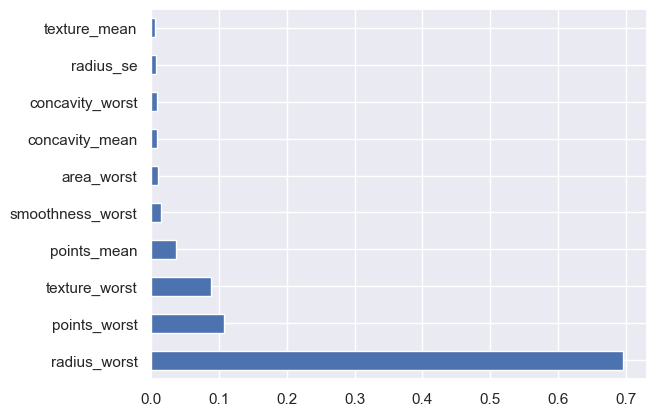

RandomForest > feature importances : 
 [0.03635634 0.01852472 0.04329214 0.04856476 0.00674455 0.0029135
 0.05524336 0.12523533 0.00292432 0.00444315 0.01354351 0.00529646
 0.02042729 0.02172411 0.00583818 0.00453529 0.00438633 0.00354193
 0.00332828 0.00504217 0.12258651 0.02051971 0.13154873 0.10512892
 0.00936937 0.01139217 0.02217508 0.12821161 0.01098384 0.00617834]


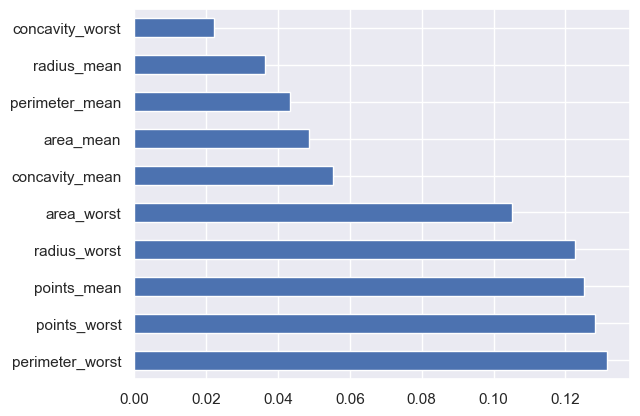

ExtraTrees > feature importances : 
 [0.03141352 0.02609489 0.07108431 0.06695993 0.00980234 0.02614854
 0.04243356 0.09843028 0.00820033 0.00692053 0.01824757 0.00612691
 0.02740044 0.02808182 0.00638579 0.00730113 0.00890103 0.01087869
 0.00608834 0.00551645 0.09192782 0.02735861 0.10293018 0.06722747
 0.01545619 0.02355157 0.02996068 0.10326983 0.01508394 0.01081732]


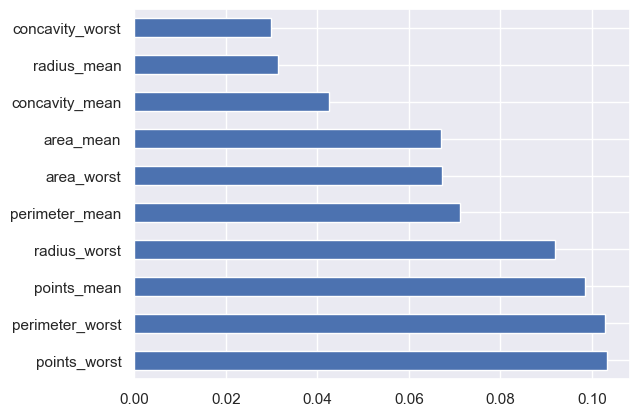

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

model = [DecisionTreeClassifier(),
         RandomForestClassifier(n_estimators=100),
         ExtraTreesClassifier(n_estimators=100)]

model = [model[i].fit(X,y) for i in range(len(model))]

num_chr = [12, 12, 10]
# Use the inbuilt feature_importances_ of tree-based classifiers
# to plot graphs of feature importances for data visualization
for i in range(len(model)):
    print(str(model[i])[:num_chr[i]] + ' > feature importances : \n',
          model[i].feature_importances_)
    feat_importances = pd.Series(model[i].feature_importances_,
                                 index=X.columns)
    feat_importances.nlargest(10).plot.barh()
    # plt.xlim(0, 0.7)
    plt.show()

<a id= normalization></a>
## 6. Normalization

In [60]:
#  selected features
X_features = X[['radius_worst', 'perimeter_worst', 'texture_worst','points_mean']]
X_features.describe(include='all')

,radius_worst,perimeter_worst,texture_worst,points_mean
count,569.000000,569.000000,569.000000,569.000000
mean,16.269190,107.261213,25.677223,0.048919
std,4.833242,33.602542,6.146258,0.038803
min,7.930000,50.410000,12.020000,0.000000
25%,13.010000,84.110000,21.080000,0.020310
50%,14.970000,97.660000,25.410000,0.033500
75%,18.790000,125.400000,29.720000,0.074000
max,36.040000,251.200000,49.540000,0.201200


### 6.1 MinMaxScaler

In [70]:
from sklearn.preprocessing import MinMaxScaler #將數據正規化到[0-1]
minmax_scaler = MinMaxScaler()

'''
合併語法
Xn = minmax_scaler.fit(X)
Xn = minmax_scaler.transform(X)
'''
Xn = minmax_scaler.fit_transform(X_features)

Xn = pd.DataFrame(Xn)  #轉換
Xn.describe()

,0,1,2,3
count,569.000000,569.000000,569.000000,569.000000
mean,0.296663,0.283138,0.363998,0.243137
std,0.171940,0.167352,0.163813,0.192857
min,0.000000,0.000000,0.000000,0.000000
25%,0.180719,0.167837,0.241471,0.100944
50%,0.250445,0.235320,0.356876,0.166501
75%,0.386339,0.373475,0.471748,0.367793
max,1.000000,1.000000,1.000000,1.000000


### 6.2 z-score Standardization

In [61]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
Xn = standard_scaler.fit_transform(X_features)

Xn = pd.DataFrame(Xn)  #轉換
Xn.describe()

,0,1,2,3
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-2.297713e-15,-1.198807e-15,1.742016e-15,1.023981e-15
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-1.726901e+00,-1.693361e+00,-2.223994e+00,-1.261820e+00
25%,-6.749213e-01,-6.895783e-01,-7.486293e-01,-7.379438e-01
50%,-2.690395e-01,-2.859802e-01,-4.351564e-02,-3.977212e-01
75%,5.220158e-01,5.402790e-01,6.583411e-01,6.469351e-01
max,4.094189e+00,4.287337e+00,3.885905e+00,3.927930e+00


<a id= splitting></a>
## 7. Splitting the training and test datasets

In [62]:
#原始資料集
X1, X2, y1, y2 = train_test_split(X, y, random_state=0,train_size=0.85, test_size=0.15)

#正規化資料集
Xn1, Xn2, yn1, yn2 = train_test_split(Xn, y, random_state=0,train_size=0.85, test_size=0.15)

<a id= confusionMatrix></a>
## 8. Setting Confusion Matrix

In [29]:
def plot_confusion_matrix(mat, matn, suptitle, output=2):
    '''Plot the confusion matrix with heatmap...'''
    plt.figure(1, figsize=(6, 3))
    plt.suptitle(suptitle)
    plt.subplot(121)
    #sns.heatmap(數據集,方格形式,註解,顏色條)
    sns.heatmap(mat, square=True, annot=True, cbar=False)
    plt.title('without Normalization')
    plt.xlim(output,0)
    plt.ylim(0,output)
    plt.xlabel('true value')
    plt.ylabel('predicted value')

    plt.subplot(122)
    sns.heatmap(matn, square=True, annot=True, cbar=False)
    plt.title('with Normalization')
    plt.xlim(output,0)
    plt.ylim(0,output)
    plt.xlabel('true value')
    plt.show()

<a id='training'></a>
## 9.Training Models for Classification

<a id= perceptron></a>
## Perceptron (感知器) Algorithm

In [71]:
from sklearn.linear_model import Perceptron

#training
p_model = Perceptron().fit(X1, y1)  # 原始資料集  
p_n_model = Perceptron().fit(Xn1, yn1) # 正規化資料集

#predict
y_model = p_model.predict(X2)    
yn_model = p_n_model.predict(Xn2) 

#預測結果(準確度)
result_X = accuracy_score(y2, y_model)
result_Xn = accuracy_score(yn2, yn_model)
print('原始資料集準確度：　{:.2f}%'.format(result_X*100))
print('正規化資料集準確度：　{:.2f}%'.format(result_Xn*100))

原始資料集準確度：　67.44%
正規化資料集準確度：　100.00%


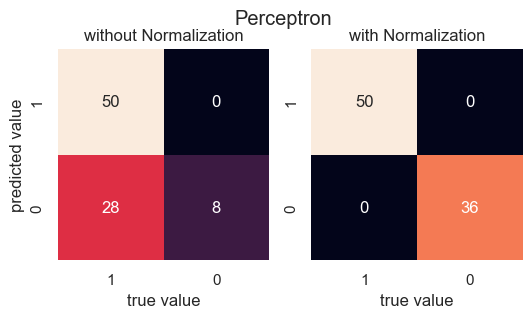

In [72]:
# Compute the confusion matrix...
mat = confusion_matrix(y2, y_model)
matn = confusion_matrix(yn2, yn_model)

# Plot the confusion matrix with heatmap...
plot_confusion_matrix(mat, matn, "Perceptron")

<a id='LogisticRegression'></a>
## Logistic Regression (邏輯回歸) Algorithm

- About the keyword argument `solver` in LogisticRegression
    - For **binary classification**, setting `liblinear`
    - For **Multi-output classification**, setting `newton-cg`

In [73]:
from sklearn.linear_model import LogisticRegression

#training
logit_model = LogisticRegression(solver='liblinear').fit(X1, y1)   
logit_n_model = LogisticRegression(solver='liblinear').fit(Xn1, yn1) 

#predict
y_model = logit_model.predict(X2)    
yn_model = logit_n_model.predict(Xn2) 

#預測結果(準確度)
result_X = accuracy_score(y2, y_model)
result_Xn = accuracy_score(yn2, yn_model)
print('原始資料集準確度：　{:.2f}%'.format(result_X*100))
print('正規化資料集準確度：　{:.2f}%'.format(result_Xn*100))

原始資料集準確度：　95.35%
正規化資料集準確度：　98.84%


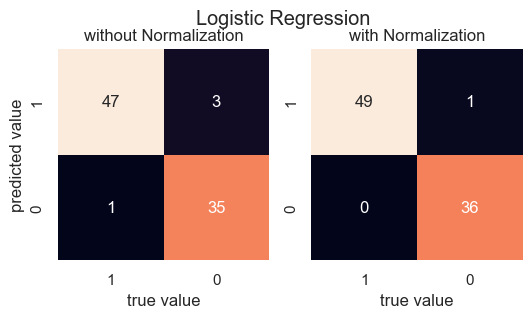

In [74]:
# Compute the confusion matrix...
mat = confusion_matrix(y2, y_model)
matn = confusion_matrix(yn2, yn_model)

# Plot the confusion matrix with heatmap...
plot_confusion_matrix(mat, matn, "Logistic Regression")

<a id='MLP'></a>
##  Multilayer Perceptron (多層感知器, MLP)

- About the keyword argument_ -`solver` - in `MLPClassifier`
    - For thousands of training samples or more, using `adam`。一種隨機梯度下降（SGD）優化算法
    - For small datasets, using `lbfgs`
- learning_rate
    - `constant` : 整個訓練過程中使用固定的學習率。
    - `adaptive` : 學習率會根據訓練的進程自動調整。這有助於加速模型收斂。

In [75]:
from sklearn.neural_network import MLPClassifier


#training
mlpc_model = MLPClassifier(hidden_layer_sizes=(500,300), #隱藏層(可多層)
                           solver='adam',             
                           learning_rate='adaptive', 
                           max_iter=2000).fit(X1, y1)   

mlpc_n_model = MLPClassifier(hidden_layer_sizes=(500,300),
                             solver='adam', 
                             learning_rate='adaptive',
                             max_iter=2000).fit(Xn1, yn1) 
    
#predict
y_model = mlpc_model.predict(X2)    
yn_model = mlpc_n_model.predict(Xn2) 

#預測結果(準確度)
result_X = accuracy_score(y2, y_model)
result_Xn = accuracy_score(yn2, yn_model)
print('原始資料集準確度：　{:.2f}%'.format(result_X*100))
print('正規化資料集準確度：　{:.2f}%'.format(result_Xn*100))

原始資料集準確度：　88.37%
正規化資料集準確度：　97.67%


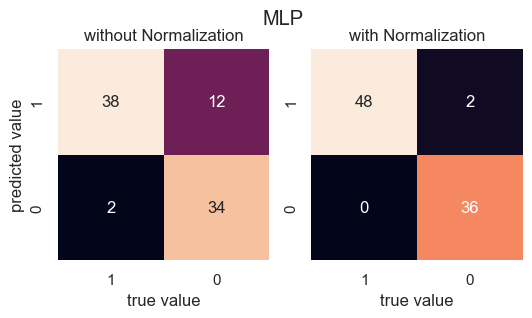

In [68]:
# Compute the confusion matrix...
mat = confusion_matrix(y2, y_model)
matn = confusion_matrix(yn2, yn_model)

# Plot the confusion matrix with heatmap...
plot_confusion_matrix(mat, matn, "MLP")

<a id='tree'></a>
##  Tree 

In [76]:
model = [
         DecisionTreeClassifier(random_state=1),
         RandomForestClassifier(n_estimators=200, random_state=1),
         ExtraTreesClassifier(n_estimators=200, random_state=1)
        ]

model = [model[i].fit(X1,y1) for i in range(len(model))]
pred  = [model[i].predict(X2) for i in range(len(model))]

acc = [accuracy_score(y2, pred[i]) for i in range(len(model))]
num_chr = [12, 12, 12, 10] #對齊
for i in range(len(model)):
    print(str(model[i])[:num_chr[i]] + ': \t', acc[i])

DecisionTree: 	 0.9069767441860465
RandomForest: 	 0.9651162790697675
ExtraTreesCl: 	 0.9534883720930233
